In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Read CSV file with space delimiter
df = pd.read_csv('/content/Earthquake_Data.csv')

In [3]:
# Rename column names for better readability
new_column_names = ["Latitude", "Longitude", "Depth", "Magnitude",
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]
df.columns = new_column_names


In [4]:
# Save the processed data to an Excel file
file_name = 'Earthquake_data_processed.xlsx'
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [5]:
# Select relevant features and target variable
features = ['Latitude', 'Longitude', 'Depth', 'No_of_Stations']
target = 'Magnitude'
X = df[features]
y = df[target]


In [9]:
# Perform feature scaling on the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
#Initialize a random forest regressor with 200 trees
rf = RandomForestRegressor(n_estimators=200, random_state=55)
# Fit the regressor to the training data
rf.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf.predict(X_test)

In [12]:
# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.17884307472774635
R^2 Score: 0.13724002932752266


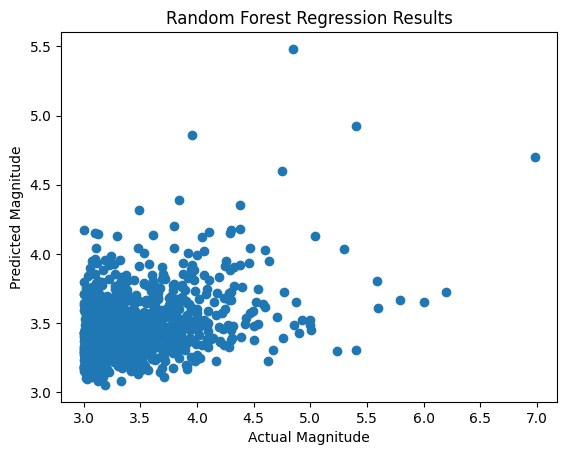

In [13]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

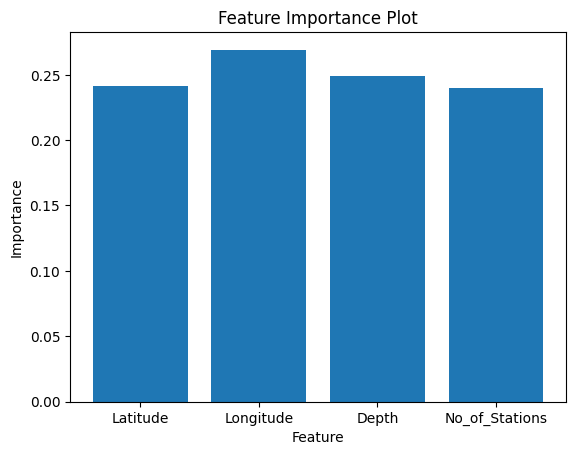

In [14]:
# Plot feature importances
importances = rf.feature_importances_
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

In [17]:
# Select relevant features for clustering
features = ['Depth', 'Magnitude']
X = df[features]

# Perform clustering using K-means algorithm
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X)
# Add the cluster labels to the dataframe
df['Cluster'] = clusters

# Analyze and assess the risk for each cluster
cluster_stats = df.groupby('Cluster')['Magnitude'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          count      mean       std  min    25%   50%   75%   max
Cluster                                                          
0        1140.0  3.418737  0.414404  3.0  3.110  3.29  3.60  6.98
1        1192.0  3.465067  0.473210  3.0  3.130  3.33  3.64  6.50
2        1994.0  3.396750  0.386320  3.0  3.110  3.29  3.55  5.79
3         311.0  3.539035  0.598690  3.0  3.120  3.31  3.84  6.50
4         639.0  3.470845  0.497940  3.0  3.105  3.28  3.70  6.80


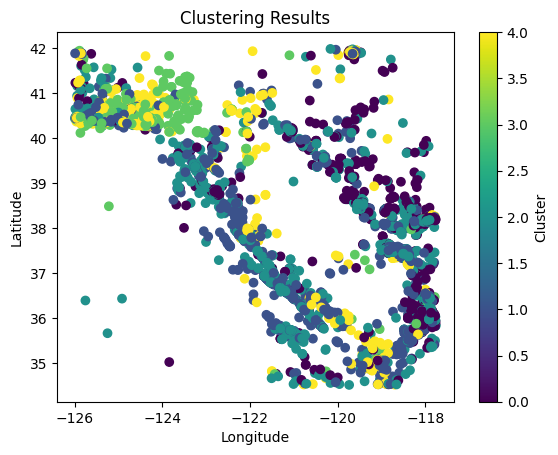

In [18]:
# Print the statistics for each cluster
print(cluster_stats)

# Visualize the clusters on a scatter plot
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()